### D212 Market Basket Analysis

Question\- What medications should be located in the automatic medication dispenser \(Pyxis\) based on their historical incidence of being prescribed together to improve medication availability and inventory management??

In [4]:
# Set up of notebook

import numpy as np  # dependancy for pandas to run, creates the arrays
import pandas as pd  # used to create the dataframe, transforms arrays into dataframes
import matplotlib.pyplot as plt  # to visualize the data
import seaborn as sns  #Used to visualize the data

from mlxtend.preprocessing import TransactionEncoder  # Transforms the data
from mlxtend.frequent_patterns import apriori, association_rules  # Run the MBA by using the Aprioi algorithm and creating the association rules

# Visualizations within notebook
%matplotlib inline
%config IPCompleter.greedy=True # Tab completion

In [5]:
market = pd.read_csv("medical_market_basket.csv")
market.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
market.shape

(15002, 20)

In [7]:
## Find duplicates
print(market.duplicated().value_counts()
      )  # this gives a count of unique values (this case is true/false)
print(market.duplicated().sum()
      )  # This gives a count of the number of duplicates(counting the true)

True     9825
False    5177
Name: count, dtype: int64
9825


In [8]:
duplicates = market[market.duplicated()]
duplicates.head(10)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
basket = market.dropna(how="all")

In [10]:
basket.shape

(7501, 20)

In [11]:
basket.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Checking the data type
print(basket.dtypes)

Presc01    object
Presc02    object
Presc03    object
Presc04    object
Presc05    object
Presc06    object
Presc07    object
Presc08    object
Presc09    object
Presc10    object
Presc11    object
Presc12    object
Presc13    object
Presc14    object
Presc15    object
Presc16    object
Presc17    object
Presc18    object
Presc19    object
Presc20    object
dtype: object


In [13]:
#Converting the data frame into a list of lists
records = []
for i in range(0, 7501):
    records.append([str(basket.values[i, j]) for j in range(0, 20)])

In [14]:
type(records)

list

In [15]:
# An example of a transaction prior to transforming the dataset
print(records[1:2])

[['citalopram', 'benicar', 'amphetamine salt combo xr', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']]


In [16]:
print(records[:5])

[['amlodipine', 'albuterol aerosol', 'allopurinol', 'pantoprazole', 'lorazepam', 'omeprazole', 'mometasone', 'fluconozole', 'gabapentin', 'pravastatin', 'cialis', 'losartan', 'metoprolol succinate XL', 'sulfamethoxazole', 'abilify', 'spironolactone', 'albuterol HFA', 'levofloxacin', 'promethazine', 'glipizide'], ['citalopram', 'benicar', 'amphetamine salt combo xr', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['enalapril', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['paroxetine', 'allopurinol', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['abilify', 'atorvastatin', 'folic acid', 'naproxen', 'losartan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']]


In [17]:
#One hot encode the data - uses the TransactionEncoder to create True/ False
#https://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
#TRUE if the med was ordered

TE = TransactionEncoder()
array = TE.fit(records).transform(records)

#Each column represents an item and each row represents a record or a transaction for one purchase.
# https://sarakmair.medium.com/market-basket-analysis-8dc699b7e27

transf_df = pd.DataFrame(array, columns=TE.columns_)
pd.set_option('display.max_columns', None)
transf_df

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,nan,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [18]:
#Review column names and check for any empty columns
TE.columns_

['Duloxetine',
 'Premarin',
 'Yaz',
 'abilify',
 'acetaminophen',
 'actonel',
 'albuterol HFA',
 'albuterol aerosol',
 'alendronate',
 'allopurinol',
 'alprazolam',
 'amitriptyline',
 'amlodipine',
 'amoxicillin',
 'amphetamine',
 'amphetamine salt combo',
 'amphetamine salt combo xr',
 'atenolol',
 'atorvastatin',
 'azithromycin',
 'benazepril',
 'benicar',
 'boniva',
 'bupropion sr',
 'carisoprodol',
 'carvedilol',
 'cefdinir',
 'celebrex',
 'celecoxib',
 'cephalexin',
 'cialis',
 'ciprofloxacin',
 'citalopram',
 'clavulanate K+',
 'clonazepam',
 'clonidine HCI',
 'clopidogrel',
 'clotrimazole',
 'codeine',
 'crestor',
 'cyclobenzaprine',
 'cymbalta',
 'dextroamphetamine XR',
 'diazepam',
 'diclofenac sodium',
 'doxycycline hyclate',
 'enalapril',
 'escitalopram',
 'esomeprazole',
 'ezetimibe',
 'fenofibrate',
 'fexofenadine',
 'finasteride',
 'flovent hfa 110mcg inhaler',
 'fluconozole',
 'fluoxetine HCI',
 'fluticasone',
 'fluticasone nasal spray',
 'folic acid',
 'furosemide',
 'g

In [19]:
#drop nan column
analysis = transf_df.drop(['nan'], axis=1)
analysis

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [20]:
analysis.to_csv("MBA_data.csv", index=False)

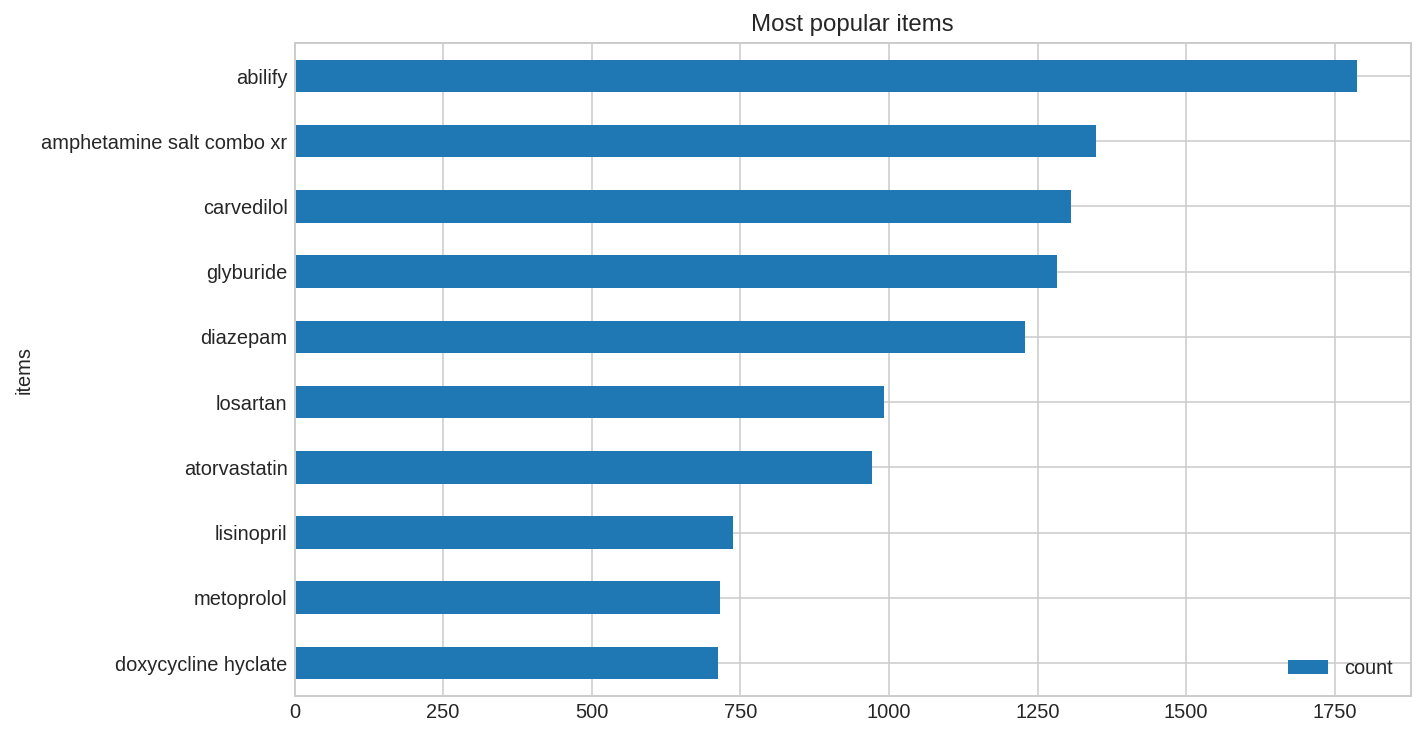

In [21]:
#most popular single items
count = analysis.loc[:, :].sum()
pop_item = count.sort_values(ascending=False).head(10)  # removed the '0'
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns={"index": "items", 0: "count"})

#Data Visualization
plt.rcParams['figure.figsize'] = (10, 6)
#matplotlib.style.use('dark_background')
plt.style.use('seaborn-v0_8-whitegrid')  # Prefer the light background
ax = pop_item.plot.barh(x='items', y='count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

In [22]:
#I have chosen 0.03 minimum support
a_rules = apriori(analysis, min_support=0.03, use_colnames=True)
a_rules.sort_values(by=['support'], ascending=False)

,support,itemsets
1,0.238368,(abilify)
7,0.179709,(amphetamine salt combo xr)
9,0.174110,(carvedilol)
22,0.170911,(glyburide)
15,0.163845,(diazepam)
26,0.132116,(losartan)
8,0.129583,(atorvastatin)
25,0.098254,(lisinopril)
29,0.095321,(metoprolol)
16,0.095054,(doxycycline hyclate)


In [23]:
a_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   54 non-null     float64
 1   itemsets  54 non-null     object 
dtypes: float64(1), object(1)
memory usage: 992.0+ bytes


In [24]:
rule_table = association_rules(a_rules, metric='lift', min_threshold=1)
rule_table.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
3,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
4,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
6,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,(doxycycline hyclate),(abilify),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
9,(abilify),(doxycycline hyclate),0.238368,0.095054,0.033729,0.141499,1.488616,0.011071,1.054100


In [25]:
rule_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         32 non-null     object 
 1   consequents         32 non-null     object 
 2   antecedent support  32 non-null     float64
 3   consequent support  32 non-null     float64
 4   support             32 non-null     float64
 5   confidence          32 non-null     float64
 6   lift                32 non-null     float64
 7   leverage            32 non-null     float64
 8   conviction          32 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.4+ KB


In [26]:
top_rules = rule_table.sort_values("lift", ascending=False)
top_rules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
29,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
11,(abilify),(lisinopril),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672


In [27]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
29,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
11,(abilify),(lisinopril),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
10,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
12,(metoprolol),(abilify),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
13,(abilify),(metoprolol),0.238368,0.095321,0.035729,0.149888,1.572463,0.013007,1.064189
22,(carvedilol),(atorvastatin),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043
23,(atorvastatin),(carvedilol),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
3,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
2,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
